In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
import os

In [27]:
save_format = "png"

In [28]:
"""severerisk: full nul,
"""

luzern = pd.read_csv("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset/DataLoader/full_luzern.csv")
luzern.index = luzern.iloc[:, 0]
luzern = luzern.iloc[:, 1:]
luzern["date"] = pd.to_datetime(luzern["date"])


In [29]:
luzern

,flow,occ,date,temp,feelslike,dew,humidity,rainfall,precipprob,snow,...,cloudcover,solarradiation,solarenergy,uvindex,conditions,icon,LOS,LOS_index,month,time_of_raining
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,262.459893,0.045575,2015-01-01 00:00:00,-3.4,-6.0,-4.8,90.04,0.000,0.0,0.0,...,30.0,0.0,0.0,0.0,1.0,0.0,A,0,1,0
1,304.639569,0.046836,2015-01-01 01:00:00,-3.4,-6.7,-4.8,90.06,0.000,0.0,0.0,...,90.0,0.0,0.0,0.0,1.0,0.0,A,0,1,0
2,240.033234,0.034573,2015-01-01 02:00:00,-3.3,-3.3,-4.8,89.57,0.000,0.0,0.0,...,50.0,0.0,0.0,0.0,1.0,0.0,A,0,1,0
3,177.826457,0.023900,2015-01-01 03:00:00,-3.6,-8.1,-5.0,90.60,0.000,0.0,0.0,...,90.0,0.0,0.0,0.0,1.0,0.0,A,0,1,0
4,155.366376,0.020704,2015-01-01 04:00:00,-3.1,-5.1,-4.4,91.14,0.000,0.0,0.0,...,90.0,0.0,0.0,0.0,1.0,0.0,A,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,190.475398,0.030405,2015-12-31 20:00:00,4.5,4.5,3.9,95.51,0.111,100.0,0.0,...,99.3,0.0,0.0,0.0,2.0,1.0,A,0,12,7
9020,167.095349,0.025052,2015-12-31 21:00:00,4.4,4.4,3.9,96.75,0.399,100.0,0.0,...,99.5,0.0,0.0,0.0,2.0,1.0,A,0,12,8
9021,213.527443,0.033442,2015-12-31 22:00:00,4.5,4.5,3.9,95.49,0.396,100.0,0.0,...,99.3,0.0,0.0,0.0,2.0,1.0,A,0,12,9


In [30]:
luzern_rain = luzern[luzern["rainfall"] > 0]
luzern_dry = luzern[luzern["rainfall"] == 0]

In [31]:
luzern_monday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 0]
luzern_tuesday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 1]
luzern_wednesday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 2]
luzern_thursday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 3]
luzern_friday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 4]
luzern_saturday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 5]
luzern_sunday_rainfall = luzern_rain[luzern_rain["date"].dt.dayofweek == 6]

luzern_monday_rainfall_at_9 = luzern_monday_rainfall[luzern_monday_rainfall["date"].dt.hour == 9]
luzern_tuesday_rainfall_at_9 = luzern_tuesday_rainfall[luzern_tuesday_rainfall["date"].dt.hour == 9]
luzern_wednesday_rainfall_at_9 = luzern_wednesday_rainfall[luzern_wednesday_rainfall["date"].dt.hour == 9]
luzern_thursday_rainfall_at_9 = luzern_thursday_rainfall[luzern_thursday_rainfall["date"].dt.hour == 9]
luzern_friday_rainfall_at_9 = luzern_friday_rainfall[luzern_friday_rainfall["date"].dt.hour == 9]
luzern_saturday_rainfall_at_9 = luzern_saturday_rainfall[luzern_saturday_rainfall["date"].dt.hour == 9]
luzern_sunday_rainfall_at_9 = luzern_sunday_rainfall[luzern_sunday_rainfall["date"].dt.hour == 9]

luzern_monday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 0]
luzern_tuesday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 1]
luzern_wednesday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 2]
luzern_thursday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 3]
luzern_friday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 4]
luzern_saturday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 5]
luzern_sunday_norainfall = luzern_dry[luzern_dry["date"].dt.dayofweek == 6]

luzern_monday_norainfall_at_9 = luzern_monday_norainfall[luzern_monday_norainfall["date"].dt.hour == 9]
luzern_tuesday_norainfall_at_9 = luzern_tuesday_norainfall[luzern_tuesday_norainfall["date"].dt.hour == 9]
luzern_wednesday_norainfall_at_9 = luzern_wednesday_norainfall[luzern_wednesday_norainfall["date"].dt.hour == 9]
luzern_thursday_norainfall_at_9 = luzern_thursday_norainfall[luzern_thursday_norainfall["date"].dt.hour == 9]
luzern_friday_norainfall_at_9 = luzern_friday_norainfall[luzern_friday_norainfall["date"].dt.hour == 9]
luzern_saturday_norainfall_at_9 = luzern_saturday_norainfall[luzern_saturday_norainfall["date"].dt.hour == 9]
luzern_sunday_norainfall_at_9 = luzern_sunday_norainfall[luzern_sunday_norainfall["date"].dt.hour == 9]

# Step 1

In [32]:
fig_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader\Figures\Full")
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

v_luzern_rain = luzern_rain.drop("date", axis=1)
v_luzern_dry = luzern_dry.drop("date", axis=1)
n = len(v_luzern_dry.columns)

for i in range(1, n):
    mask_dry = ~pd.isna(v_luzern_dry.iloc[:, i])
    mask_rain = ~pd.isna(v_luzern_rain.iloc[:, i])
    print(f"figure {i}")
    plt.figure(figsize=(10, 6))
    plt.scatter(v_luzern_rain.iloc[:, i][mask_rain], v_luzern_rain['flow'][mask_rain], c="b")
    plt.scatter(v_luzern_dry.iloc[:, i][mask_dry], v_luzern_dry['flow'][mask_dry], c="r")
    plt.xlabel(v_luzern_dry.columns[i])
    plt.ylabel("Flow")
    plt.title(f"Flow vs {v_luzern_dry.columns[i]}")
    plt.savefig(fig_path / f"Flow vs {v_luzern_dry.columns[i]}.{save_format}", format=save_format)
    plt.close()

figure 1
figure 2
figure 3
figure 4
figure 5
figure 6
figure 7
figure 8
figure 9
figure 10
figure 11
figure 12
figure 13
figure 14
figure 15
figure 16
figure 17
figure 18
figure 19
figure 20
figure 21
figure 22
figure 23


In [33]:
fig_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader\Figures\monday")
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

v_luzern_rain = luzern_monday_rainfall.drop("date", axis=1)
v_luzern_dry = luzern_monday_norainfall.drop("date", axis=1)
n = len(v_luzern_dry.columns)

for i in range(1, n):
    mask_dry = ~pd.isna(v_luzern_dry.iloc[:, i])
    mask_rain = ~pd.isna(v_luzern_rain.iloc[:, i])
    print(f"figure {i}")
    plt.figure(figsize=(10, 6))
    plt.scatter(v_luzern_rain.iloc[:, i][mask_rain], v_luzern_rain['flow'][mask_rain], c="b")
    plt.scatter(v_luzern_dry.iloc[:, i][mask_dry], v_luzern_dry['flow'][mask_dry], c="r")
    plt.xlabel(v_luzern_dry.columns[i])
    plt.ylabel("Flow")
    plt.title(f"Flow vs {v_luzern_dry.columns[i]}")
    plt.savefig(fig_path / f"Flow vs {v_luzern_dry.columns[i]}.{save_format}", format=save_format)
    plt.close()

figure 1
figure 2
figure 3
figure 4
figure 5
figure 6
figure 7
figure 8
figure 9
figure 10
figure 11
figure 12
figure 13
figure 14
figure 15
figure 16
figure 17
figure 18
figure 19
figure 20
figure 21
figure 22
figure 23


In [34]:
fig_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader\Figures\monday_at_9")
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

v_luzern_rain = luzern_monday_rainfall_at_9.drop("date", axis=1)
v_luzern_dry = luzern_monday_norainfall_at_9.drop("date", axis=1)
n = len(v_luzern_dry.columns)

for i in range(1, n):
    mask_dry = ~pd.isna(v_luzern_dry.iloc[:, i])
    mask_rain = ~pd.isna(v_luzern_rain.iloc[:, i])
    print(f"figure {i}")
    plt.figure(figsize=(10, 6))
    plt.scatter(v_luzern_rain.iloc[:, i][mask_rain], v_luzern_rain['flow'][mask_rain], c="b")
    plt.scatter(v_luzern_dry.iloc[:, i][mask_dry], v_luzern_dry['flow'][mask_dry], c="r")
    plt.xlabel(v_luzern_dry.columns[i])
    plt.ylabel("Flow")
    plt.title(f"Flow vs {v_luzern_dry.columns[i]}")
    plt.savefig(fig_path / f"Flow vs {v_luzern_dry.columns[i]}.{save_format}", format=save_format)
    plt.close()

figure 1
figure 2
figure 3
figure 4
figure 5
figure 6
figure 7
figure 8
figure 9
figure 10
figure 11
figure 12
figure 13
figure 14
figure 15
figure 16
figure 17
figure 18
figure 19
figure 20
figure 21
figure 22
figure 23


# Step 2

In [35]:
luzern_numeric = luzern.drop('date', axis=1)
luzern_numeric = luzern_numeric.drop('LOS', axis=1)
luzern_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9024 entries, 0 to 9023
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flow              9024 non-null   float64
 1   occ               9024 non-null   float64
 2   temp              8886 non-null   float64
 3   feelslike         8886 non-null   float64
 4   dew               8886 non-null   float64
 5   humidity          8886 non-null   float64
 6   rainfall          8886 non-null   float64
 7   precipprob        8886 non-null   float64
 8   snow              8884 non-null   float64
 9   snowdepth         8884 non-null   float64
 10  windgust          8847 non-null   float64
 11  windspeed         8886 non-null   float64
 12  winddir           8886 non-null   float64
 13  sealevelpressure  8884 non-null   float64
 14  cloudcover        8886 non-null   float64
 15  solarradiation    8886 non-null   float64
 16  solarenergy       8886 non-null   float64
 17  

In [37]:
fig_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader")
luzern_1 = luzern_numeric.dropna(inplace=False)
corr_matrix = luzern_1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(fig_path / f"Correlation Matrix.{save_format}", format=save_format)
plt.close()

# Step 3

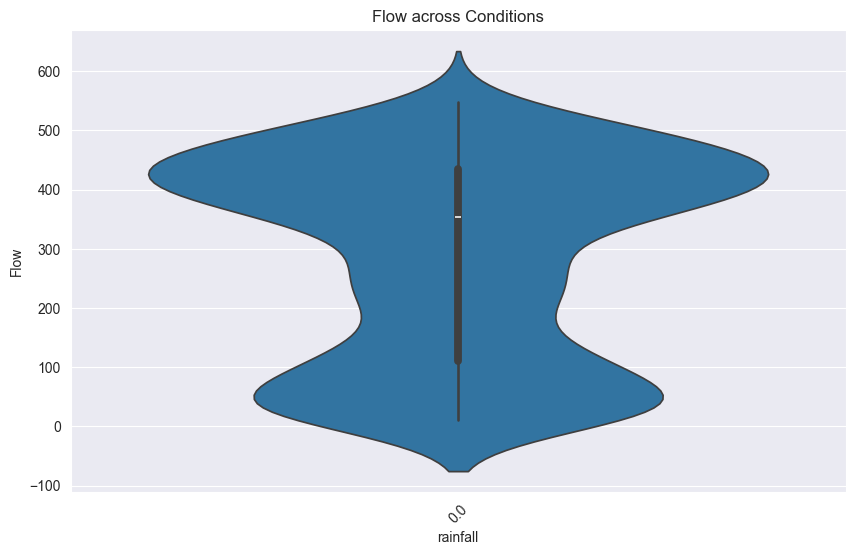

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="rainfall", y="flow", data=luzern_monday_norainfall)
plt.xlabel('rainfall')
plt.ylabel('Flow')
plt.title('Flow across Conditions')
plt.xticks(rotation=45)
plt.show()

# Step 4

In [39]:
import Statistical_Hypothesis_Tests

stat = Statistical_Hypothesis_Tests.Correlation()

ModuleNotFoundError: No module named 'statsmodels'

In [40]:
data1 = luzern_1["flow"]
data2 = luzern_1["rainfall"]
data2 = luzern_1["LOS_index"]
data2 = luzern_1["humidity"]
data2 = luzern_1["temp"]


In [41]:
stat.pearson(data1, data2)

NameError: name 'stat' is not defined

In [42]:
stat.spearman(data1, data2)

NameError: name 'stat' is not defined